In [37]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [38]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


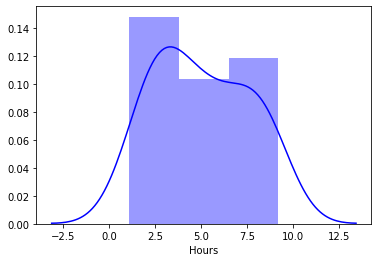

In [8]:
sns.distplot(data["Hours"],color="blue")

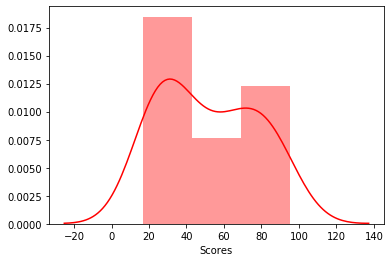

In [7]:
sns.distplot(data["Scores"],color="red")

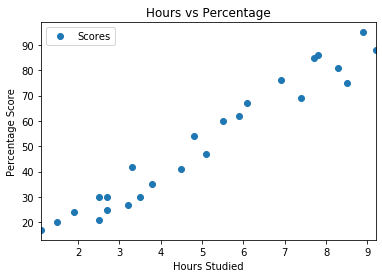

In [11]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(x.shape,y.shape)

(25, 1) (25,)


Applying Linear Regression Model

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [15]:
#Calculating m(slope)
m=lr.coef_
m

array([9.91065648])

In [27]:
#Calculating c(intercept)
c=lr.intercept_
c

2.018160041434683

Vizualizing Actual and predicted data

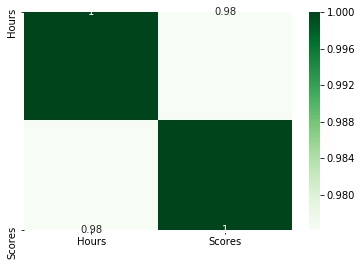

In [28]:
sns.heatmap(data.corr(),cmap="Greens" ,annot=True)
plt.show()

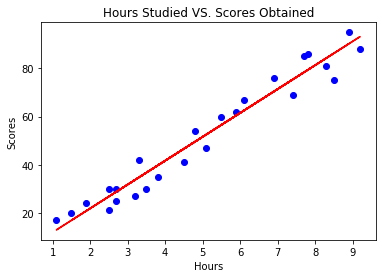

In [29]:
plt.scatter(x,y,c="blue")
plt.plot(x,m*x+c,color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Studied VS. Scores Obtained")
plt.show()

Comparing Actual and predicted values


In [30]:
final=pd.DataFrame(
{
    "Actual Scores":y_test,
    "Predicted Scores":y_pred
})

In [31]:
final.reset_index(drop=True,inplace=True)

In [32]:
final

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


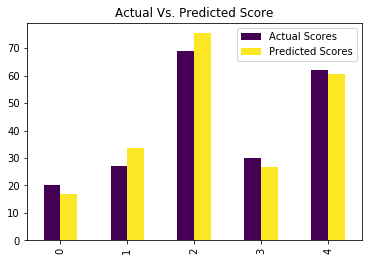

In [33]:
final.plot(kind="bar",cmap="viridis")
plt.title("Actual Vs. Predicted Score")
plt.show()

In [34]:
hours=9.25
marks=lr.predict([[9.25]])
print("The Scores Of Student on studying for {} hours is {}" .format(hours,marks[0].round(2)))

The Scores Of Student on studying for 9.25 hours is 93.69


In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
